# Multi-armed Bandits & Exploration-Exploitation tradeoff

<br><div style="text-align: justify"> 
Reinforcement Learning differs from other Machine Learning algorithms mainly to its evaluating nature, rather than instructive, on the training phase. Accordingly, RL algorithms learn from experience through exploring and interacting with the environment, taken decisions are evaluated to determine how good they are. On the other hand, insctructive feedback relies on indicating the correct action regardless of the actual decision, used mainly in supervised learning algorithms.
</div> 

## k-armed Bandit Problem

<br><div style="text-align: justify"> 
The k-armed Bandit problem is a generalizaton of a slot machine or 'one-armed bandit'. In this problem, one must repeatedly choose from k options or actions over a defined period of time. Once an action is performed, a numerical reward from a probability function that depends on the action taken will be recieved. This goal of an agent on this problem is to maximize the total reward over the time horizon. 
</div> 


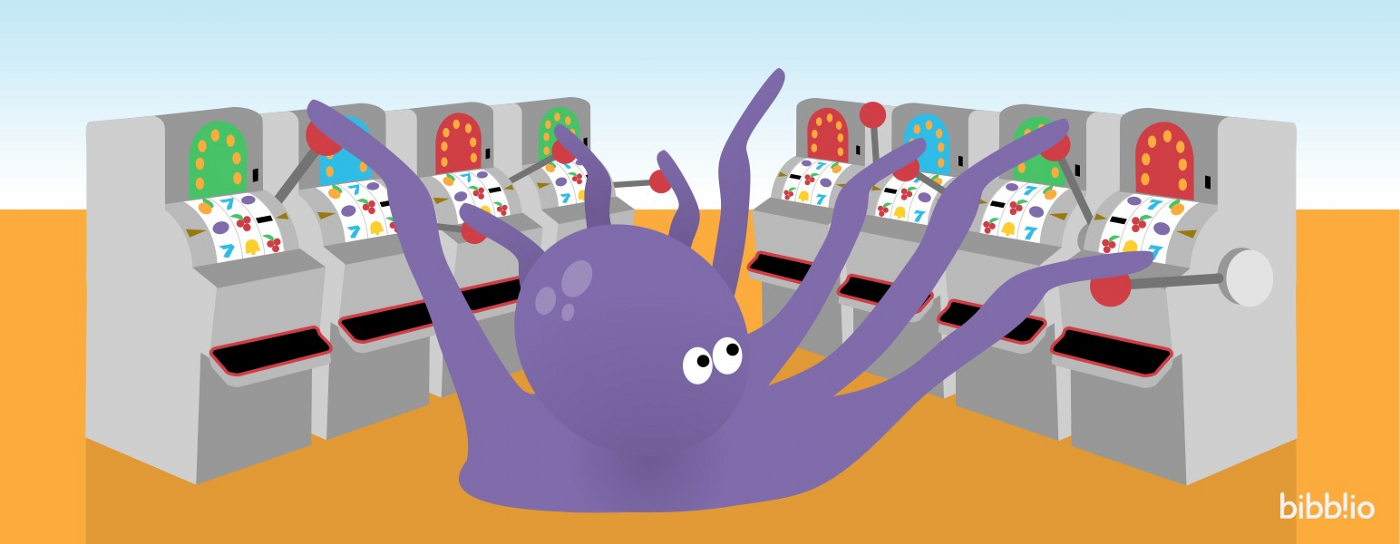

<br><div style="text-align: justify"> 
On this problem, each one of the k actions, levers or bandits has an expected or mean reward, this will be refered as the value of the action. If we define $A_t$ as the action taken at time step $t$, $R_t$ the corresponding percieved reward, and $q_*(a)$ the mentioned value of a particular action a, then the following equation represents te dynamics of the action values.
</div> 
    
$$
q_*(a) = \mathbb{E}[R_t| A_t = a]
$$

<br><div style="text-align: justify"> 
Knowing the values of all actions would make this a trivial problem, always selecting the highest $q_*(a)$ would maximize the overall reward. But, this values are unknown. However, there might be estimates that will be represented as $Q_t(a)$, through the training process the goal is to calibrate $Q_t(a)$ to be as close to $q_*(a)$ as possible. 
</div>

## Exploration - Exploitation Trade-off

<br><div style="text-align: justify"> 
Considering the estimates at a given time step $t$, one of the actions will have the highest estimated value. These are refered as *greedy* actions. The methodology of evaluating actions and taking only the *greedy* is **exploiting** the current knowledge of action values. Exploiting the greedy actions will maximize the expected return on the current time step. On the other hand, when choosing non-greedy actions, the agent will be **exploring** the environment. The exploration will promote the recolection on new information of nongreedy states and may improve the overall reward on the long run. Reward is lower on the short run when exploring the action and state space, but it may lead to higher reward on the long run because it allows to discover actions with higher value unknown before. Since it is imposible to do both simultaneously, this is known as the  exploration-explotation conflict or tradeoff. Whether it's better to explore or exploit depends in a complex way on the precise values of the estimates, uncertainties, and the number of remaining steps. There are many sophisticated methodologies to approach this dilema. However, most of this methods make assumptions stationarity and prior knowledge that doesn't represent many of the real-world problems approached by RL. There are some simple methods to balance exploration and exploitation applied to the k-armed bandit that help to visualize the importance of the problem arrised by this tradeoff. 
</div>

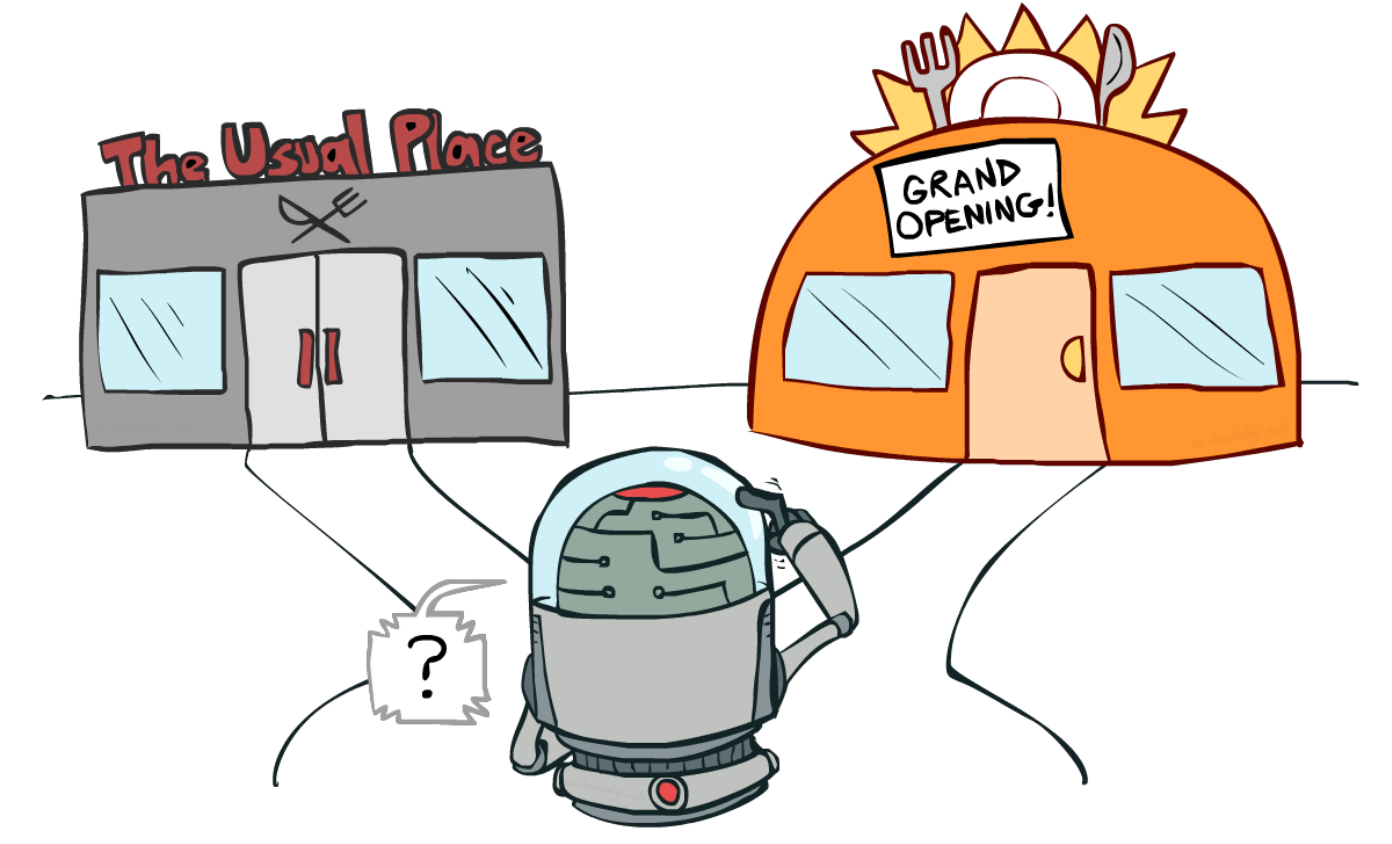

## Action-Value Methods
 
<br><div style="text-align: justify">
Action-value methods seek to estimate the value of actions and using the estimates to make action selection decisions. Being mindful that the value of an action is the expected reward when that action is selected, one natural way to estimate the value is by averaging the rewards actually received. This is shown in the next expresion, where $\mathbb{1}_{A_i=a}$ is an indicator function that indicates with a binary variable if the condition ($A_i=a$ in this case) is true or not. 
</div>

$$
Q_t(a)=\frac{sum \space of \space rewards \space when \space a \space taken \space prior \space to \space t}{number \space of \space times \space a \space taken \space prior \space to \space t} = \frac{\sum_{i=1}^{t-1}{R_i*\mathbb{1}_{A_i=a}}}{\sum_{i=1}^{t-1}{\mathbb{1}_{A_i=a}}}
$$

<br><div style="text-align: justify"> 
If the denominator of the function is 0, meaning $a$ has not been chosen yet, then $Q_t(a)$ is initialized arbitrarily. When the denominator goes to infinity, then $Q_t(a)$ converges to $q_*(a)$. This is called a **sample-average** method for estimating action values, due to the averaging nature of the estimation. 
</div>


<br><div style="text-align: justify"> 
The simplest action selection rule is to select the one with highest value, defined as greedy actions before. If there is more than one *greedy* action, then one of them is selected in an arbitrary way, perhaps randomly. The *greedy* action selection method is writen as
</div>

$$
A_t = arg\max_a{Q_t(a)}
$$

<br><div style="text-align: justify"> 
As it is expected, the *greedy* action selection method exploits the known information, disregarding if other apparently inferior actions are actually better. A simple alternative is to select actions greedily most of the time, but every once in a while, select randomly from all possible actions with equal probability. When the non-greedy actions are chosen with $\epsilon$ probability, these are called $\epsilon$-*greedy* methods.
</div>

<br><div style="text-align: justify"> 
An environment with 10-armed bandits is simulated 2,000 times. The 10 bandit's $q_*(a)$ were generated using a normal distribution with mean 0 and deviance 1. On every trial of a bandit, the reward was generated using a normal distribution with mean $q_*(a)$ and deviance 1. On this environments three policies were evaluated: greedy, 0.01-greedy and 0.1-greedy. As expected, the greedy policy performs best in the early stages of the simulation but finds a roof when the greedy actions are defined, disregarding all other actions. On the other hand, the $\epsilon$-greedy policies performed better at the long run. Through exploration, these policies found better actions and achieved higher rewards as shown:
</div>

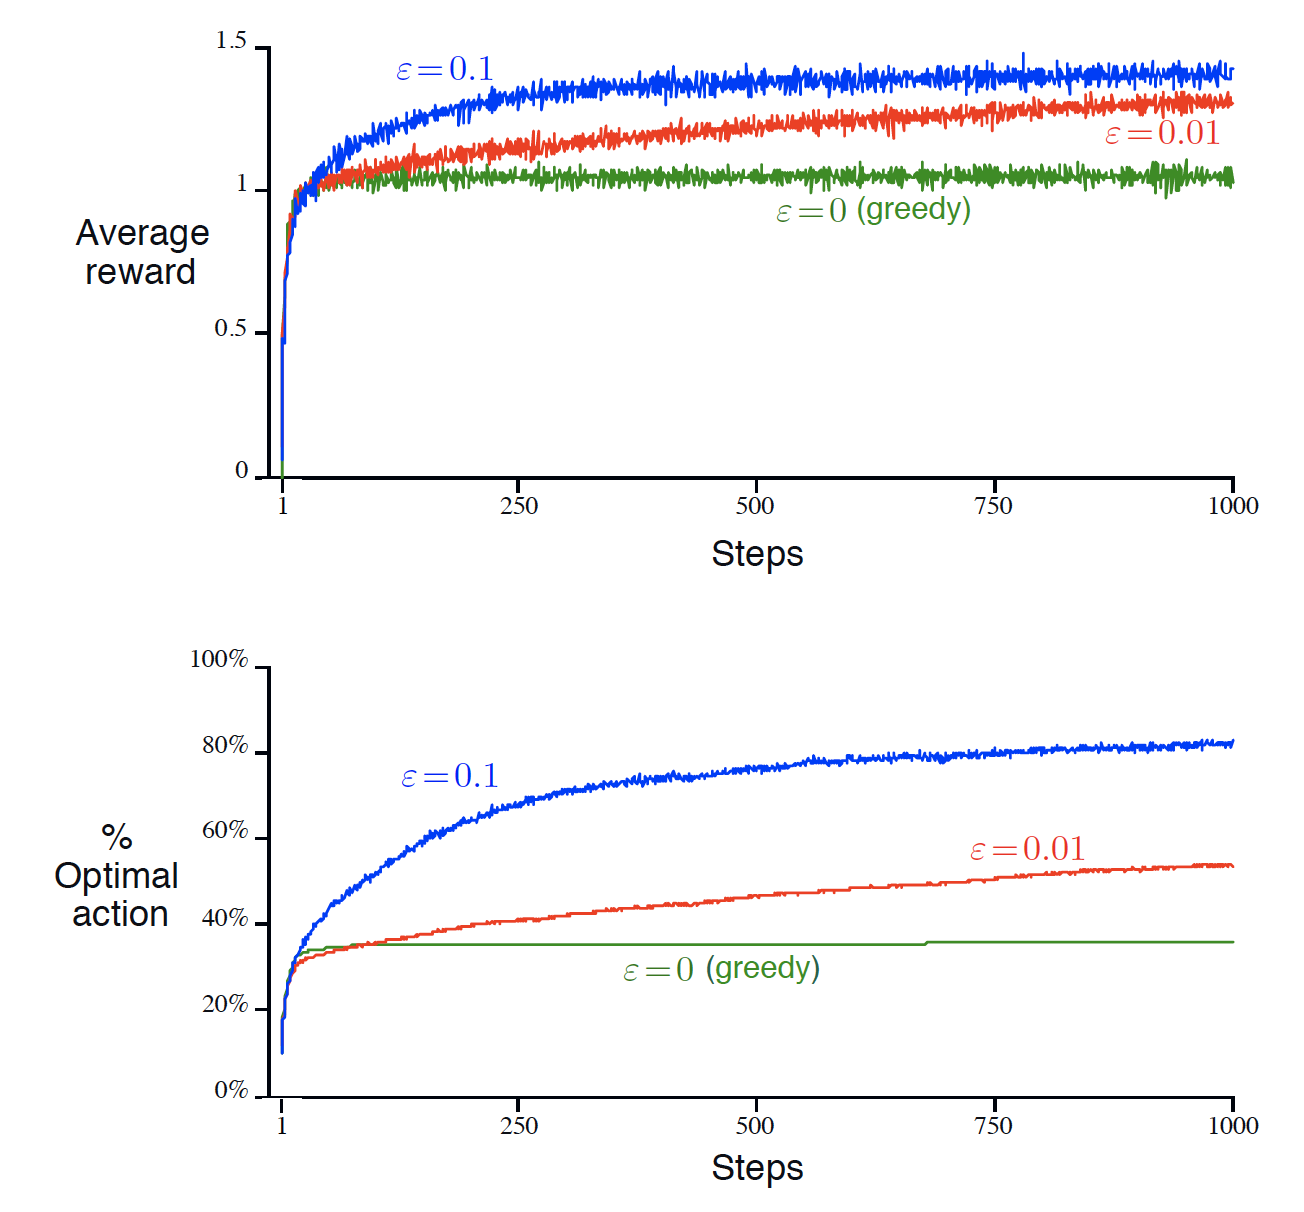

## Incremental Implementation

<br><div style="text-align: justify"> 
In the sample-averge method mentioned previously, an adjustment can be made on the computations to save memory throughout the time steps. On the initial computation, all rewards received must be stored to calculate the average. However, rearranging the terms: 
</div>

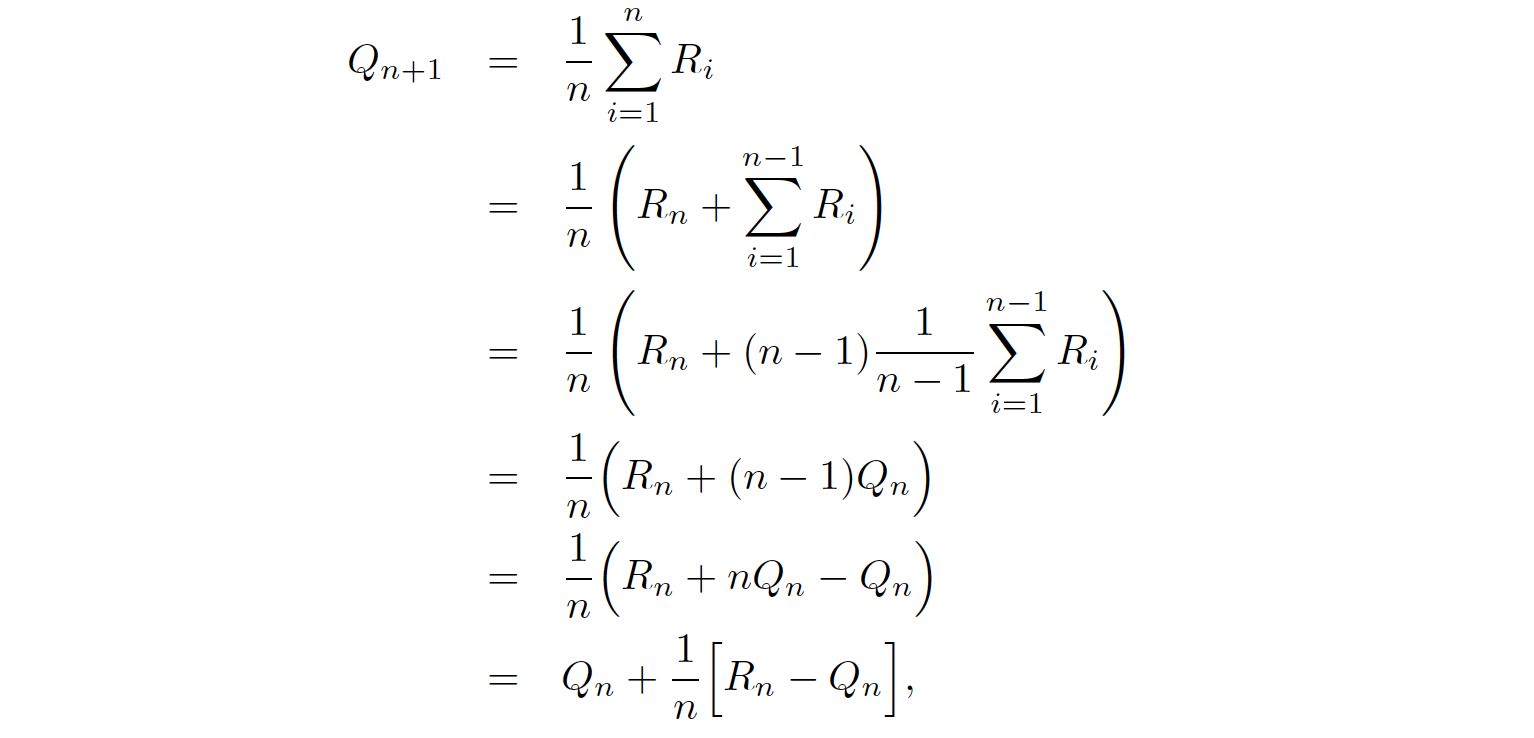

<br><div style="text-align: justify"> 
On this new implementation, it's only required memory to store $n$ and $Q_n$ to make a simple computation when updating an estimate. The general form of this is shown below, where $[Target + Old \space Estimate]$ is the error in the estimate.
</div><br>

$$
New \space Estimate = Old \space Estimate + Step \space Size \space [Target - Old \space Estimate]
$$

<br><div style="text-align: justify">
The step size used in the incremental method changes in time. In processing the nth reward for action a, the method uses the step-size parameter $\frac{1}{n}$. The step size will be denoted by $\alpha$ or, moregenerally, by $\alpha_t(a)$.  
</div>

<br><div style="text-align: justify">
Pseudocode for a complete bandit algorithm using incrementally computed sample averages and "-greedy action selection is shown in the box below. The function bandit(a) is assumed to take an action and return a corresponding reward.
</div>


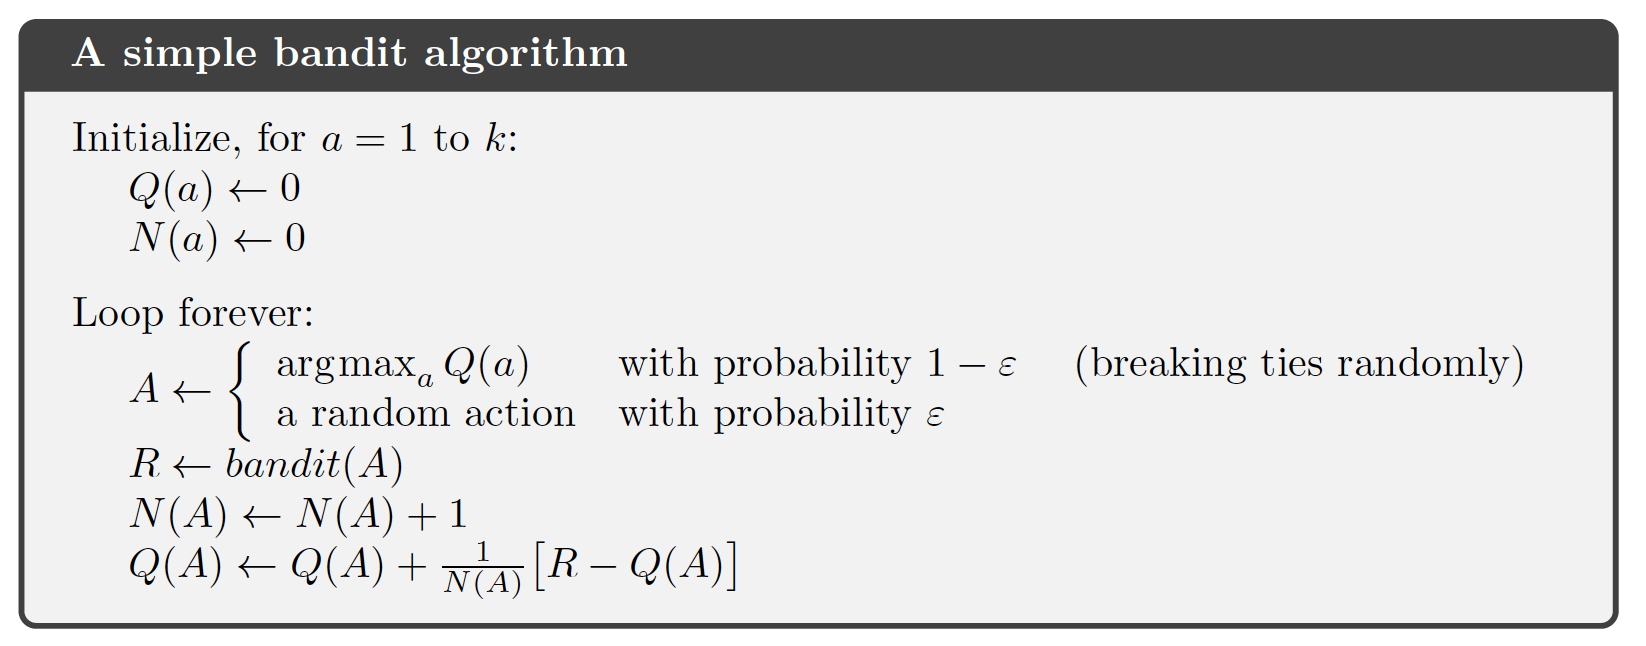

In [11]:
import numpy as np

# Epsilon, number of bandits and q_* (or expected rewards)
epsilon = 0.05;     k = 10;    q = list(np.random.normal(0, 1, k))

########### Simple bandit algorithm ##########
# Initialize, for a = 0 to k-1:
Q = {a:0 for a in range(k)};    N = {a:0 for a in range(k)}

# Loop for number of time-steps
n_steps = 100000
for t in range(n_steps):
    random = np.random.random()
    
    # Exploration
    if random <= epsilon:
        A = np.random.choice(range(k))
        
    # Exploitation when 1 greedy action
    elif list(Q.values()).count(max(Q.values())) == 1:
        i = list(Q.values()).index(max(Q.values()));   A = list(Q.keys())[i]
    
    # Exploitation when more than 1 greedy action
    else:
        i = [x for x in range(k) if Q[x] == max(Q.values())];   A = np.random.choice(i)
    
    # Perceiving the reward
    R = np.random.normal(q[A],1)
    
    # Updating number of times the bandit has been chosen
    N[A] +=1
    
    # Updating estimate
    Q[A] = Q[A] + (1/N[A]) * (R - Q[A])

# Report results
max_bandit = q.index(max(q))
print(f'The bandit with highest expected reward was {max_bandit}')
print(f'The real expected reward is {round(q[max_bandit],4)}, the estimated reward is {round(Q[max_bandit],4)}\n')

#print("The other bandit's expected rewards and estimates:")
#for i in range(k):
    #print(f'Bandit {i}: Expected reward: {round(q[i],3)}. Estimate: {round(Q[i],3)}')

The bandit with highest expected reward was 2
The real expected reward is 1.574, the estimated reward is 1.5769



## Tracking Non-Stationary Problems

<br><div style="text-align: justify">
The averaging methods mentioned eralier all give the same importance to new rewards as to old rewards. This can be desirable in stationary problems, where the characteristics of the bandits don't change over time. Nevertheless, many of the applications of RL face non-stationary problems. In this problems, it makes more sense to give more importance to new information rather to long-past rewards. One of the most popular ways of doing this is to use a constant step-size parameter. Using this method, the incremental update rule would be:
</div>

$$
Q_{n+1} = Q_n + \alpha (R_n - Q_n)
$$

<br><div style="text-align: justify">
Where the step parameter $\alpha \in [0,1]$ is constant. Then, the result $Q_{n+1}$ is a weighted sum of all the perceived rewards and the inital estimate $Q_1$. 
</div>

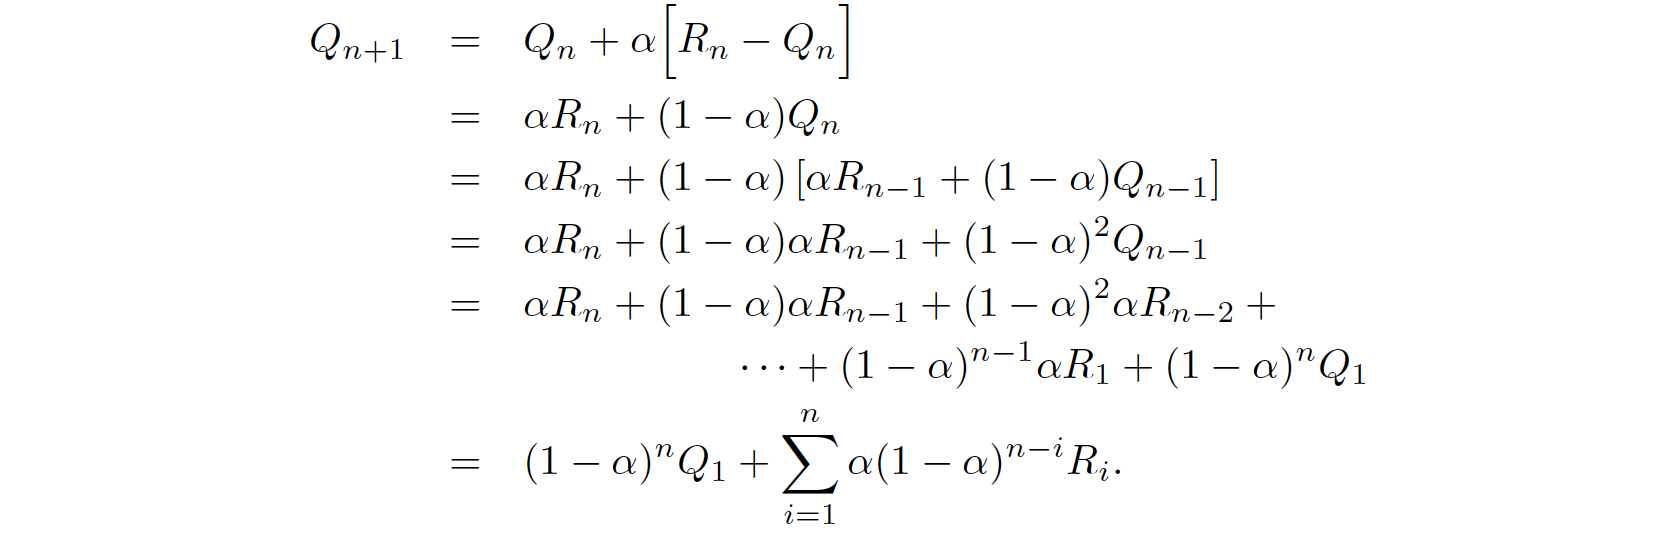

<br><div style="text-align: justify">
This is called a weighted sum because the sum of the weights $(1-\alpha)^n + \sum_{i=1}^{n}{\alpha(1-\alpha)^{n-i}} = 1$. The quantity $(1-\alpha)$ is always less than 1, and the exponent $n-1$ is a positive integer, then, the weight given to a reward $R_i$ decreases as the time since it's perception increases. Note that when $\alpha = 0$ there is no modification over the estimation, it remains $Q_1$. Furthermore, when $\alpha = 1$ the estimate will be $R_n$ on every time-step. This is sometimes called exponential recency-weighted average
</div>

<br><div style="text-align: justify">
Sometimes it might be convenient to vary the step-size parameter on every step. We denote $\alpha_n(a)$ as the size step to process the reward after choosing for the $n^{th}$ time action a. As defined previously, if $\alpha_n(a) = 1/n$ then this is the sample-average method to estimate action values, which is guaranteed to converge to the real action values by the law of large numbers. A well-known result in stochastic approximation theory gives us the conditions required to assure convergence with probability 1:
</div>

$$
\sum_{n=1}^∞{\alpha_n(a)}=∞ \space \space \space \space \space \space and \space \space \space \space \space \space \sum_{n=1}^∞{\alpha_n(a)^2} < ∞
$$


## Optimistic Initial Values

<br><div style="text-align: justify">
All the methods reviewed have some sort of *bias* based on the initial values asigned on the estimates $Q_1(a)$. In practice, this *bias* is not a problem and can be helpfull on the estimation of values. The downside is that they become a parameter that must be picked and perhaps tuned by the user. The upside is that they provide an easy way to supply some prior knowledge about what level of rewards can be expected.
</div>

<br><div style="text-align: justify">
By acknowledging this bias, it can be used to promote exploration. Returning to the 10 armed-bandit expermient mentioned earlier, recall that $q_*(a)$ were generated with a normal distribution using mean 0 and variance 1. Picking 5 as initial estimates instead of 0, would be widely optimistic. Nevertheless, by picking such optimistic values, the agent will do a fair amount of exploration even if *greedy* actions are chosen everytime. When the first bandit is chosen, the reward is most likely to be 'disappointing' even if the bandit has te higher $q_*(a)$. When the estimation is updated, the next greedy action will be a not yet explored bandit. The result is that each bandit will be explored several times before the estimations converge to the real values. 
</div>

<br><div style="text-align: justify">
As show in the graph below, using optimistic initial values will have a poor performance at the beggining of the training phase due to the considerable amount of exploration. As the training continues, the exploration decreases and it outperforms the previous neutral (0) initial estimation values. This is a good strategy when approaching stationary problems. Although any method that relies on information based on the initial state of the environment will not be desirable for non-stationary problems.  
</div>

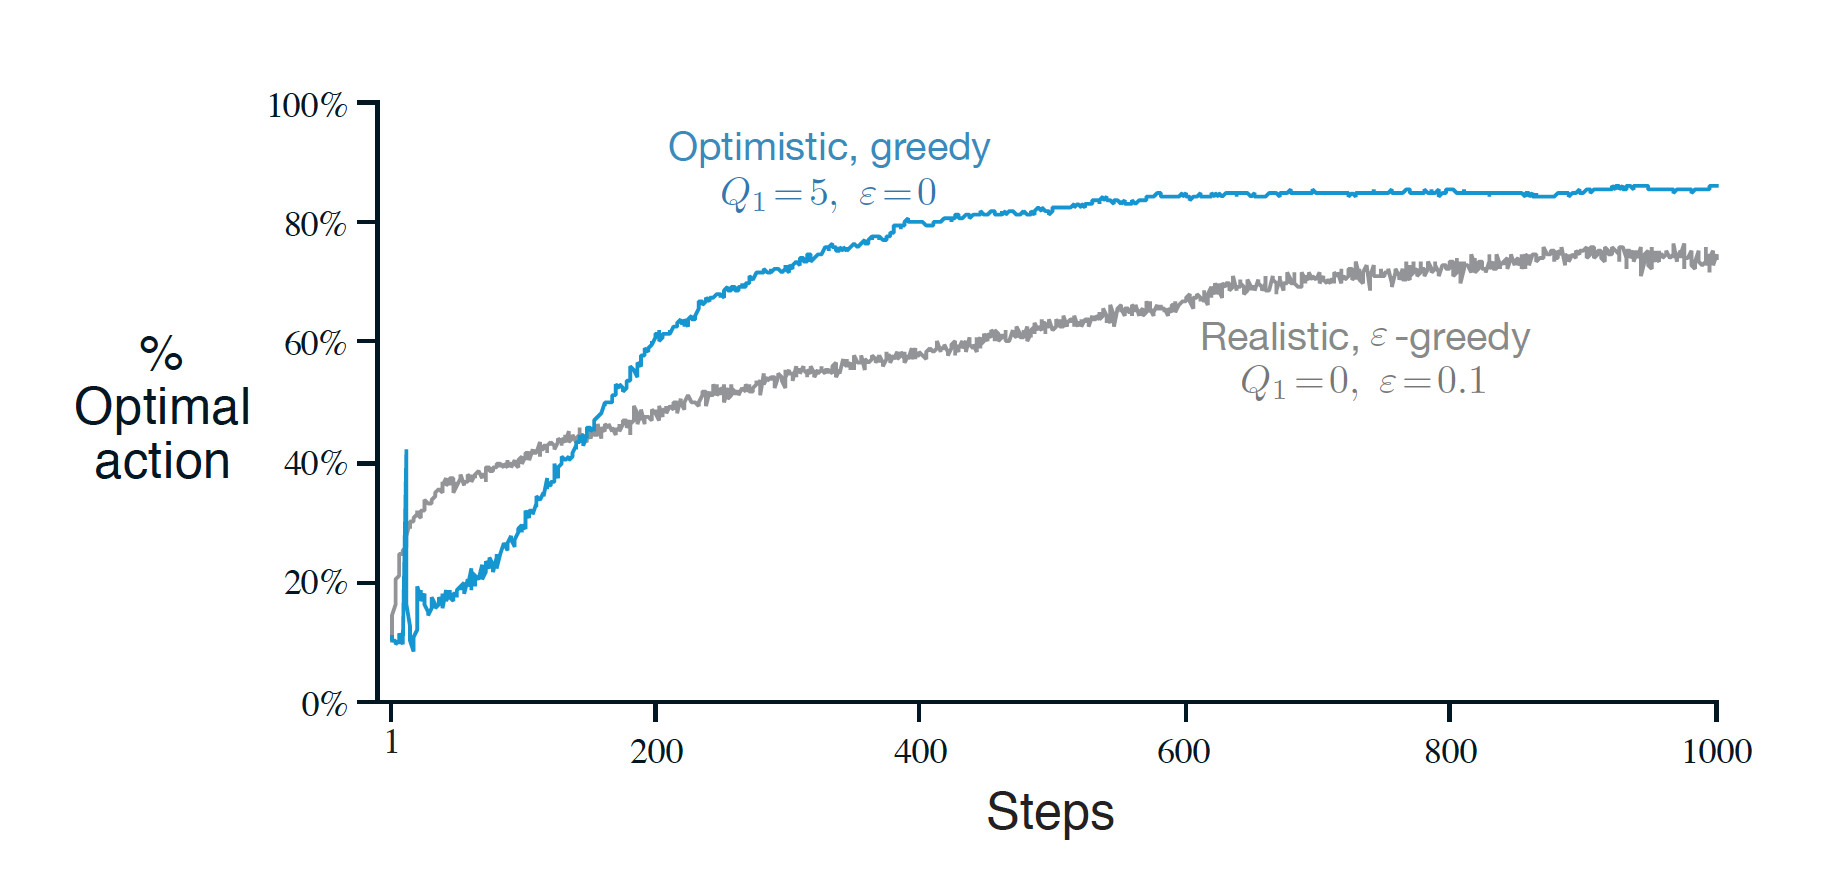

## Upper-Confidence-Bound Action Selection

<br><div style="text-align: justify">
Exploration is a neccesary part of the training phase because of the uncertainty about the accuracy of the action-value estimates. Greedy actions appear to be best in the present, but due to lack of information other non-greedy actions might be better. The $\epsilon$-greedy action method forces non-greedy actions to be explored, but in a indiscriminate way. It would be better to explore actions that might be optimal with two criteria: How close are the actual estimates to te maximal and the accuracy of the estimation of those actions. One effective way to do this is to select actions based on:
</div>

$$
A_t= arg\max_a\left[{Q_t(a)+c\sqrt{\frac{\ln{t}}{N_t(a)}}}\space \right]
$$

<br><div style="text-align: justify">
Where $c>0$ controls the degree of exploration. If $N_t(a) = 0$ then a is considered to be a maximizing action. 
</div>

<br><div style="text-align: justify">
The idea of this upper confidence bound (UCB) action selection is that the square-root term is a measure of the uncertainty or variance in the estimate of a’s value. The quantity being max’ed over is thus a sort of upper bound on the possible true value of action a, with c determining the confidence level. Each time a is selected the uncertainty is presumably reduced: $N_t(a)$ increments, and, as it appears in the denominator, the uncertainty term decreases. On the other hand, each time an action other than a is selected, $t$ increases but $N_t(a)$ does not; because $t$ appears in the numerator, the uncertainty estimate increases. The use of the natural logarithm means that the increases get smaller over time, but are unbounded; all actions will eventually be selected, but actions with lower value estimates, or that have already been selected frequently, will be selected with decreasing frequency over time.
</div>

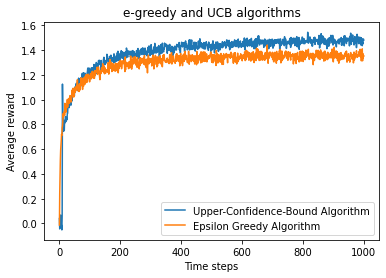

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Epsilon, number of bandits, q_* (or expected rewards) and c constant for UCB
epsilon = 0.1;     k = 10;    c = 2

########### e-greedy VS UCB ##########
# Simulation and environment parameters
num_simulations = 2000;  time_steps = 1000;   t_hor = range(1, time_steps + 1)
Cum_egreedy = {t:0 for t in t_hor}; Cum_UCB = {t:0 for t in t_hor}

# Simulation of 2000 episodes
for sim in range(num_simulations):
    
    # Generating bandits and estimations
    q = list(np.random.normal(0, 1, k))
    Q_egreedy = {a:0 for a in range(k)};    N_egreedy = {a:0 for a in range(k)}
    Q_UCB = {a:0 for a in range(k)};    N_UCB = {a:0 for a in range(k)}
    
    for t in t_hor:

        # e-greedy
        random = np.random.random()
        if random <= epsilon:     A_egreedy = np.random.choice(range(k))
        elif list(Q_egreedy.values()).count(max(Q_egreedy.values())) == 1:    
            i = list(Q_egreedy.values()).index(max(Q_egreedy.values()));    A_egreedy = list(Q_egreedy.keys())[i]
        else:     
            i = [x for x in range(k) if Q_egreedy[x] == max(Q_egreedy.values())];  A_egreedy = np.random.choice(i)

        # UCB
        UCB = {}; boolean = False
        for a in Q_UCB.keys():
            if N_UCB[a] == 0:     A_UCB = a;    boolean = True
            else:    UCB[a] = Q_UCB[a] + c * ((np.log(t) / N_UCB[a]) ** (1/2))

        if not boolean:    i = list(UCB.values()).index(max(list(UCB.values())));   A_UCB = list(UCB.keys())[i]

        # Rewards
        R_egreedy = np.random.normal(q[A_egreedy], 1);    R_UCB = np.random.normal(q[A_UCB], 1)

        # Update visit times
        N_egreedy[A_egreedy] += 1;    N_UCB[A_UCB] += 1

        # Updating values
        Q_egreedy[A_egreedy] += (1/N_egreedy[A_egreedy]) * (R_egreedy - Q_egreedy[A_egreedy])
        Q_UCB[A_UCB] += (1/N_UCB[A_UCB]) * (R_UCB - Q_UCB[A_UCB])

        # Capture Rewards
        Cum_egreedy[t] += R_egreedy;    Cum_UCB[t] += R_UCB

        
Avg_egreedy = [Cum_egreedy[t]/num_simulations for t in t_hor]
Avg_UCB = [Cum_UCB[t]/num_simulations for t in t_hor]

plt.plot(t_hor, Avg_UCB, label = "Upper-Confidence-Bound Algorithm")
plt.plot(t_hor, Avg_egreedy, label = "Epsilon Greedy Algorithm")

plt.xlabel('Time steps');  plt.ylabel('Average reward');   plt.title('e-greedy and UCB algorithms')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()  

## Gradient Bandit Algorithm

<br><div style="text-align: justify">
All the methods reviewed previously are based on estimations of the actions values for their selection. This works quite well but is not the only way to do this. There is other method which computes a numerical value that indicates the *preference* of an action a, denoted as $H_t(a)$. The higher the preference, the more often an action is chosen. Although, the preference value has no interpretation related to action values. Only the relative preference of one action over another is important; if we add 1000 to all the action preferences there is no effect on the action probabilities, which are determined according to a soft-max distribution (i.e., Gibbs or Boltzmann distribution) as follows.
</div>

$$
Pr\{A_t = a\} = \frac{e^{H_t(a)}}{\sum_{b=1}^{k}{e^{H_t(b)}}} = \pi_t(a)
$$

<br><div style="text-align: justify">
In the ecuation, a new term is introduced,$\pi_t(a)$, which denotes the probability of choosing action $a$ at time-step $t$. Initially all action preferences are the same (e.g., $H_1(a) = 0$, for all $a$) so that all actions have an equal probability of being selected. 
</div>

<br><div style="text-align: justify">
There is a natural learning algorithm for this setting based on the idea of stochastic gradient ascent. On each step, after selecting action $A_t$ and receiving the reward $R_t$, the action preferences are updated by:
</div>

$$
H_{t+1}(A_t) = H_t(A_t) + \alpha(R_t - \bar{R_t})(1 - \pi_t(A_t)),  \space \space \space \space \space \space \space \space \space and,
$$

$$
H_{t+1}(a) = H_t(a) - \alpha(R_t - \bar{R_t})\pi_t(a) \space \space \space \space \space \space \space \space \space \forall \space \space a  \neq A_t
$$

<br><div style="text-align: justify">
where $\alpha$ is a constant step-size parameter and $\bar{R_t} \in \mathbb{R}$ is the average of all the rewards up through and including time $t$. The  $\bar{R_t}$ term serves as a baseline with which the reward is compared. If the perceived reward is higher than the baseline, then the probability of chosing $A_t$ in the future increases and the probability of chosing other actions decrease. Accordingly if the reward is lower than the baseline, the probablitiy of $A_t$ decreases and the probabilities of the others increase.
</div>


**Bibliography**

Sutton, R. S., & Barto, A. G. (2018). Reinforcement learning: An introduction. MIT press.